# Init

In [1]:
from pycqed.measurement.waveform_control import circuit_builder as cb_mod
from pycqed.measurement import calibration_points as cp_mod
from pycqed.analysis import analysis_toolbox as a_tools
from pycqed.measurement import sweep_points as sp_mod
from pycqed.utilities import general as gen
from IPython.display import clear_output
from collections import OrderedDict
import matplotlib.pyplot as plt
from importlib import reload
from pprint import pprint
from copy import deepcopy
import numpy as np
import h5py
import os

c:\users\qudev102\desktop\working_folder\pycqed_py3\data
Data directory set to: c:\users\qudev102\desktop\working_folder\pycqed_py3\data


C:\Users\Qudev102\Anaconda3\envs\pycqed36\lib\site-packages\theano\configdefaults.py:560: UserWarning:




In [2]:
from pycqedscripts.init.xld.virtual_ATC66_M124_S7P11_PQSC import *
from pycqed.measurement import multi_qubit_module as mqm
data_folder = r'C:\Users\Qudev102\Desktop\working_folder\data'
a_tools.datadir = data_folder
clear_output()

In [3]:
from pycqed.instrument_drivers.meta_instrument.qubit_objects import QuDev_transmon as QdvTrmn
QdvTrmn.add_CZ_pulse(qb1, qb4)
qb1.upCZ_qb4_channel('AWG1_ch1')
qb1.upCZ_qb4_aux_channels_dict({})
qbc = qb1
qbt = qb4
cz_pulse_name = f'upCZ {qbt.name} {qbc.name}'


QdvTrmn.add_CZ_pulse(qb1, qb3)
qb1.upCZ_qb3_channel('AWG1_ch1')
qb1.upCZ_qb3_aux_channels_dict({'AWG1_ch4': 0.73})
qbc = qb1
qbt = qb3
cz_pulse_name = f'upCZ {qbt.name} {qbc.name}'


QdvTrmn.add_CZ_pulse(qb2, qb4)
qb2.upCZ_qb4_channel('AWG1_ch2')
qb2.upCZ_qb4_aux_channels_dict({'AWG1_ch5': 0.75})
qbc = qb2
qbt = qb4
cz_pulse_name = f'upCZ {qbt.name} {qbc.name}'


QdvTrmn.add_CZ_pulse(qb2, qb5)
qb2.upCZ_qb5_channel('AWG1_ch2')
qb2.upCZ_qb5_aux_channels_dict({})
qbc = qb2
qbt = qb5
cz_pulse_name = f'upCZ {qbt.name} {qbc.name}'


QdvTrmn.add_CZ_pulse(qb3, qb6)
qb3.upCZ_qb6_channel('AWG1_ch3')
qb3.upCZ_qb6_aux_channels_dict({})
qbc = qb3
qbt = qb6
cz_pulse_name = f'upCZ {qbt.name} {qbc.name}'


QdvTrmn.add_CZ_pulse(qb4, qb6)
qb4.upCZ_qb6_channel('AWG1_ch4')
qb4.upCZ_qb6_aux_channels_dict({'AWG1_ch7': 0.9})
qbc = qb4
qbt = qb6
cz_pulse_name = f'upCZ {qbt.name} {qbc.name}'


QdvTrmn.add_CZ_pulse(qb4, qb7)
qb4.upCZ_qb7_channel('AWG1_ch4')
qb4.upCZ_qb7_aux_channels_dict({'AWG1_ch6': 0.5})
qbc = qb4
qbt = qb7
cz_pulse_name = f'upCZ {qbt.name} {qbc.name}'


QdvTrmn.add_CZ_pulse(qb5, qb7)
qb5.upCZ_qb7_channel('AWG1_ch5')
qb5.upCZ_qb7_aux_channels_dict({})
qbc = qb5
qbt = qb7
cz_pulse_name = f'upCZ {qbt.name} {qbc.name}'

def get_qbaux(qbc, qbt):
    if qbc == qb1 and qbt == qb3:
        qbms = qb4
    elif qbc == qb2 and qbt == qb4:
        qbms = qb5
    elif qbc == qb4 and qbt == qb6:
        qbms = qb7
    elif qbc == qb4 and qbt == qb7:
        qbms = qb6
    else:
        qbms = None
    return qbms

from pycqed.utilities import general as gen
qubits = [qb1, qb2, qb3, qb4, qb5, qb6, qb7]
timestamp = '20200427_233508'
for qb in qubits:
    gen.load_settings(qb, timestamp=timestamp)
clear_output()

# measure_cphase_multi_gates

## Example call

The idea: <br>
The keys in SweepPoints MUST be of the form 'pulse_name.pulse_param_to_sweep,' where pulse_name is the unique pulse name that is created in Block.add_pulse_names and param_to_sweep is a key in that pulse's dict what will be swept. <br>
Any instantiation of Block, adds unique names to all the pulses in self.pulses based on the op_code and the number of times this op_code has already occurred in self.pulses. <br>
For example: if the pulse list contains pulse dicts for the operations <br>
['X180 qb1', 'X90s qb3', 'upCZ qb3 qb1', 'upCZ qb3 qb1', 'X180 qb1', 'X90s qb3'],<br>
then these pulses will have the names<br>
['X180 qb1 1', 'X90 qb3 1', 'upCZ qb3 qb1 1', 'upCZ qb3 qb1 2', 'X180 qb1 2', 'X90 qb3 2'] (s is removed).<br>
Hence, if we want to sweep phase of the second X90 pulse, the corresponding key in SweepPoints would be 'X90 qb3 2.phase'.
This way, the user can sweep any parameter of any pulse by just knowing the order of the pulses in the measurement he is creating.
<br> <br>
Please check out the detailed dostring and comments in the function measure_cphase_multi_gates and the function it calls.

In [ ]:
num_cz_gates = 1
leakage_qubits = [qb1, qb2]
ramsey_qubits = [qb3, qb4]
CB = cb_mod.CircuitBuilder(leakage_qubits + ramsey_qubits)

sweep_points_2d = sp_mod.SweepPoints()
for qbl, qbr in zip(leakage_qubits, ramsey_qubits):
    cz_gate_name = CB.get_cz_gate_name(qbl, qbr)
    # sweep amplitude of each gate (same amps for each gate)
    sweep_points_2d.add_sweep_parameter(
        f'{cz_gate_name}.amplitude',
        CB.operation_dict[cz_gate_name]['amplitude'] + np.linspace(-0.005, 0.005, 11),  
        'V', 'Pulse amplitude')
#     sweep pulse lengths of each gate (same lengths for each gate)
    sweep_points_2d.add_sweep_parameter(
        f'{cz_gate_name}.pulse_length', 
        CB.operation_dict[cz_gate_name]['pulse_length'] + np.linspace(-10e-9, 10e-9, 11), 
        's', 'Pulse length')

# Optionals:
ramsey_phases = np.linspace(0, 2*np.pi, 6)*180/np.pi # no need to provide it
max_flux_lengths = {CB.get_cz_gate_name(qbl, qbr): 
                    max(CB.operation_dict[CB.get_cz_gate_name(qbl, qbr)]['pulse_length'] + 
                        np.linspace(-10e-9, 10e-9, 11)) for qbl, qbr in zip(leakage_qubits, ramsey_qubits)}

cphses, leakages, pop_loss, ana_obj = \
    mqm.measure_cphase_multi_gates(leakage_qubits, ramsey_qubits, sweep_points_2d,
                                   max_flux_lengths=max_flux_lengths, ramsey_phases=ramsey_phases,
                                   num_cz_gates=num_cz_gates)

## Function unwrapped - plot segments

In [5]:
num_cz_gates = 1
leakage_qubits = [qb3, qb2]
ramsey_qubits = [qb1, qb4]

CB = cb_mod.CircuitBuilder(leakage_qubits + ramsey_qubits)
ramsey_phases = np.linspace(0, 2*np.pi, 6)*180/np.pi
sweep_points_2d = sp_mod.SweepPoints()
for qbl, qbr in zip(leakage_qubits, ramsey_qubits):
    # sweep amplitude of each gate (same amps for each gate)
    sweep_points_2d.add_sweep_parameter(f'{CB.get_cz_gate_name(qbl, qbr)}.amplitude',
                                        np.array([0.1247, 0.375]), 'V', 'Pulse amplitude')
    # sweep pulse lengths of each gate (same lengths for each gate)
#     sweep_points_2d.add_sweep_parameter(f'{CB.get_cz_gate_name(qbl, qbr)}.pulse_length', 
#                                         np.array([100e-9, 200e-9]), 's', 'Pulse length')


    

# This code is in the measure function; see detailed comments in multi_qubit_module.py
qubits = leakage_qubits + ramsey_qubits
CB = cb_mod.CircuitBuilder(qubits)
ro_qubits = qubits

sp = sp_mod.SweepPoints()
for qbl, qbr in zip(leakage_qubits, ramsey_qubits):
    sp.add_sweep_parameter(
        f'X90 {qbr.name} 2.phase', np.tile(ramsey_phases, 2),
        'deg', 'Phase, $\\theta$')
    sp.add_sweep_parameter(
        f'X180 {qbl.name} 1.amplitude',
        'lambda sp, amp: amp*np.concatenate([np.ones(len(sp[0]['
            f'"X90 {qbr.name} 2.phase"][0])//2), np.zeros(len(sp[0]['
            f'"X90 {qbr.name} 2.phase"][0])//2)])',
        'V', 'Amplitude, $A$')  
    sp.add_sweep_parameter(
        f'X180 {qbl.name} 2.amplitude',
        f'lambda sp, amp: amp*np.concatenate([np.ones(len(sp[0]['
            f'"X90 {qbr.name} 2.phase"][0])//2), np.zeros(len(sp[0]['
            f'"X90 {qbr.name} 2.phase"][0])//2)])',
        'V', 'Amplitude, $A$')    
sp_2d_temp = deepcopy(sweep_points_2d)
for qbl, qbr in zip(leakage_qubits, ramsey_qubits):        
    for sp2d_name in sweep_points_2d[0]:
        if CB.get_cz_gate_name(qbl, qbr) in sp2d_name:
            sp_info = sp_2d_temp[0].pop(sp2d_name)
            for n in range(num_cz_gates):
                sp_2d_temp[0][
                    f'{CB.get_cz_gate_name(qbl, qbr)} {n+1}.' 
                    f'{sp2d_name.split(".")[-1]}'] = sp_info  
sp += sweep_points_2d    

cal_states = cp_mod.CalibrationPoints.guess_cal_states('auto', for_ef=True)
cp = cp_mod.CalibrationPoints.multi_qubit([qb.name for qb in qubits], cal_states, n_per_state=1)

cz_durations = {
    CB.get_cz_gate_name(q1, q2): num_cz_gates*CB.get_max_cz_gate_duration(q1, q2, sp)
    for q1, q2 in zip(leakage_qubits, ramsey_qubits)}
base_ops = [repr('X180 {qbl.name}'), repr('X90s {qbr.name}')]
base_ops += num_cz_gates*['CB.get_cz_gate_name({qbr.name}, {qbl.name})']
base_ops += [repr('X180 {qbl.name}'), repr('X90s {qbr.name}')]
ops = [eval(op.format(qbl=qbl, qbr=qbr)) for qbl, qbr in
       zip(leakage_qubits, ramsey_qubits) for op in base_ops]
pulses = CB.block_from_ops('B', ops).pulses
pulse_modifs = {i*len(base_ops): {"ref_pulse": "segment_start"}
                for i in range(len(ops)//len(base_ops))}
pulse_modifs.update({ops.index(czn)+num_cz_gates: {"pulse_delay": d, "ref_pulse": pulses[ops.index(czn)-1]['name']}
                     for czn, d in cz_durations.items()})
max_dur_idx = np.argmax([
    CB.get_ops_duration(ops[i*len(base_ops): (i+1)*len(base_ops)])
    for i in range(len(ops)//len(base_ops))])
ro_ref_pulse = pulses[max_dur_idx*len(base_ops): (max_dur_idx+1)*len(base_ops)][-1][
    'name']
sequences, hard_sweep_points, soft_sweep_points = \
    CB.sweep_2d(ops, sp, cp, pulse_modifs=pulse_modifs,
                ro_kwargs={'ref_pulse': ro_ref_pulse,
                           'qb_names': [qb.name for qb in ro_qubits]})

In [6]:
pulse_modifs

{0: {'ref_pulse': 'segment_start'},
 5: {'ref_pulse': 'segment_start'},
 3: {'pulse_delay': 1.58236224e-07, 'ref_pulse': 'X90 qb1 1'},
 8: {'pulse_delay': 9.051170100000001e-08, 'ref_pulse': 'X90 qb4 1'}}

(<Figure size 4800x4500 with 5 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028CA26A7320>],
       dtype=object))

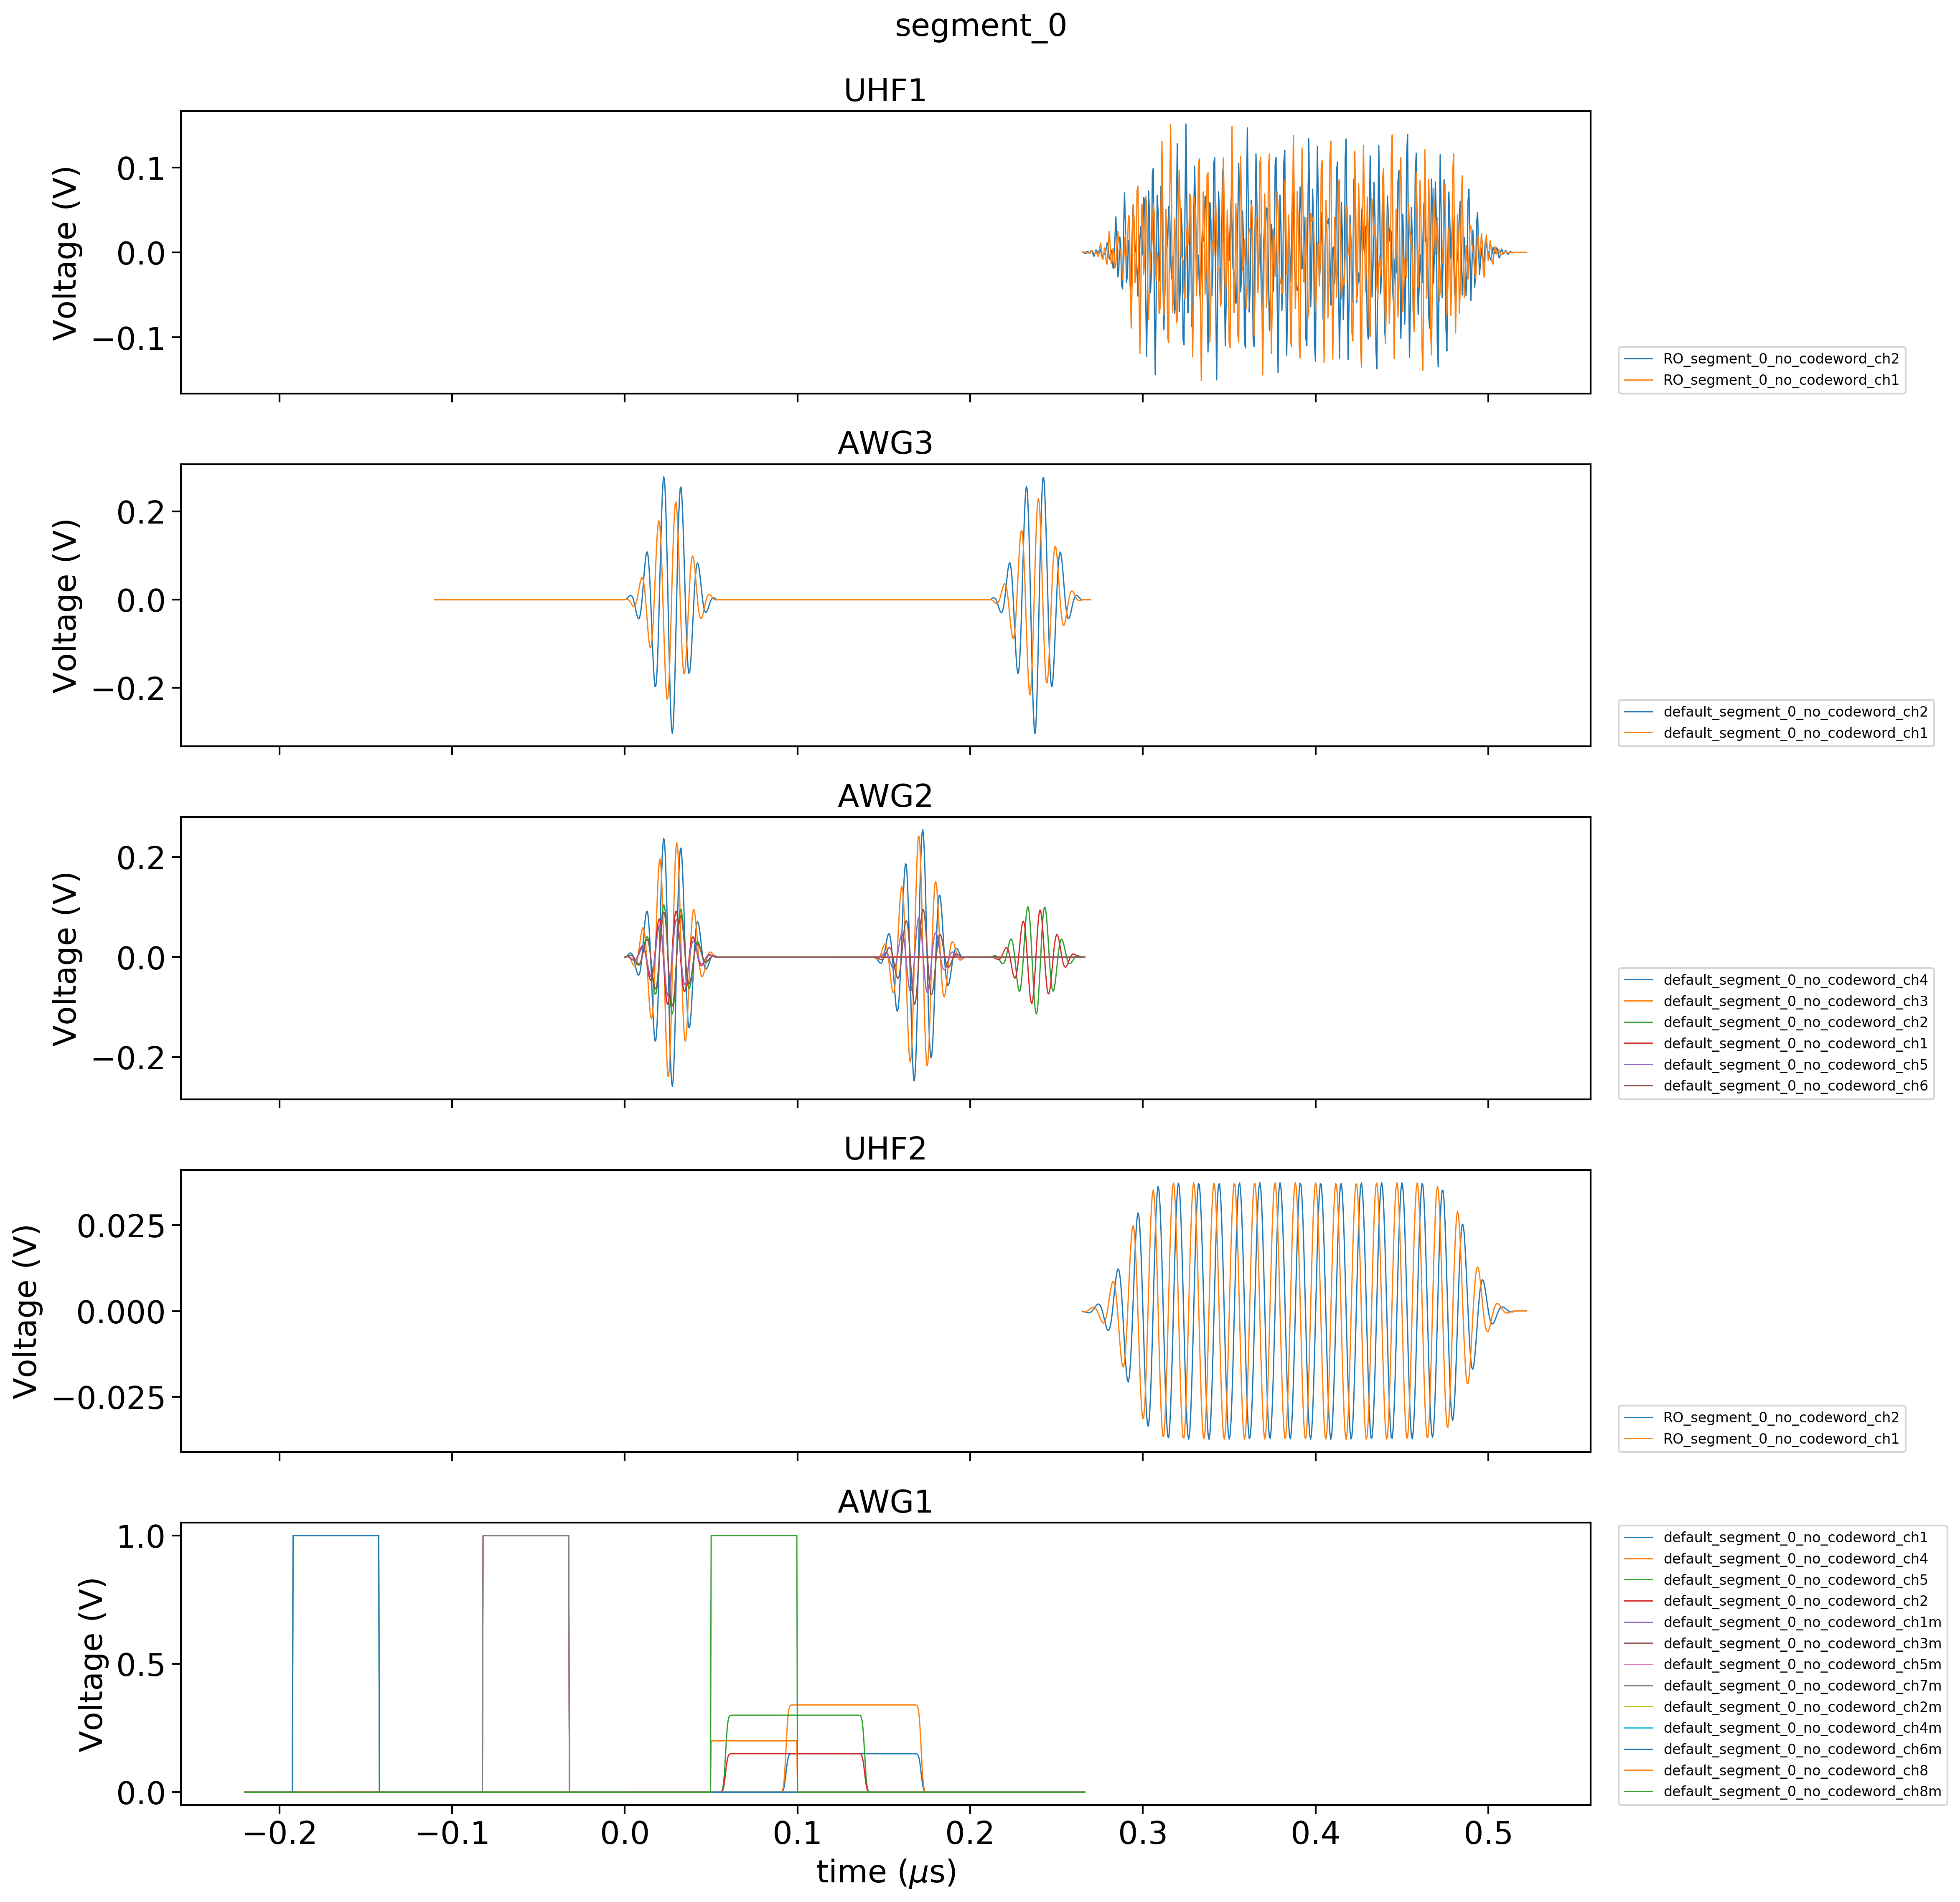

In [7]:
sequences[1].segments['segment_0'].plot()